In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

In [14]:
df = pd.read_csv('../data/processed/model_data.csv')
df.sample(5)

,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate
569,0,4,4,0,150.0,1,12,50,1,1,1,1,1,1,1,0.2400
2014,1,4,4,2,13.0,8,1,52,1,1,1,1,1,1,1,0.0192
1171,0,4,4,0,150.0,1,4,34,1,1,1,1,1,1,1,0.1176
175,0,4,4,0,150.0,1,5,58,1,1,1,1,1,1,1,0.0862
966,0,4,4,0,150.0,1,6,43,1,1,1,1,1,1,1,0.1395


In [7]:
print(df.shape)
df.info()

(2042, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   break_type                   2042 non-null   int64  
 1   break_nature                 2042 non-null   int64  
 2   break_apparent_cause         2042 non-null   int64  
 3   break_categorization         2042 non-null   int64  
 4   asset_size                   2042 non-null   float64
 5   asset_material               2042 non-null   int64  
 6   num_breaks                   2042 non-null   int64  
 7   age_at_break                 2042 non-null   int64  
 8   positive_pressure_maintaned  2042 non-null   int64  
 9   air_gap_maintaned            2042 non-null   int64  
 10  mechanical_removal           2042 non-null   int64  
 11  flushing_excavation          2042 non-null   int64  
 12  higher_velocity_flushing     2042 non-null   int64  
 13  anode_i

In [9]:
df.describe()

,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate
count,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.0,2042.0000
mean,0.010284,3.143976,3.398139,0.121450,182.353085,1.989226,3.270323,46.313418,0.998041,0.998041,0.991675,0.992165,0.994123,0.984819,1.0,inf
std,0.100912,1.570438,1.345927,0.470533,88.297880,1.596751,2.448568,13.930875,0.044227,0.044227,0.090884,0.088192,0.076452,0.122303,0.0,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0093
25%,0.000000,4.000000,4.000000,0.000000,150.000000,1.000000,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0312
50%,0.000000,4.000000,4.000000,0.000000,150.000000,1.000000,3.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0588
75%,0.000000,4.000000,4.000000,0.000000,200.000000,4.000000,4.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.1000
max,1.000000,5.000000,6.000000,2.000000,1200.000000,8.000000,12.000000,108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,inf


In [20]:
inf_values = df[df['failure_rate'] == np.inf]
inf_values

,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate


In [21]:
df = df.drop(inf_values.index, axis=0)
df.describe()

,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.0,2036.000000
mean,0.010314,3.141454,3.396365,0.121807,182.595776,1.976916,3.275049,46.449902,0.998035,0.998035,0.991650,0.992141,0.994106,0.985265,1.0,0.083351
std,0.101059,1.572063,1.347513,0.471180,88.272741,1.582756,2.450089,13.722198,0.044292,0.044292,0.091017,0.088321,0.076564,0.120519,0.0,0.156406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.009300
25%,0.000000,4.000000,4.000000,0.000000,150.000000,1.000000,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.031200
50%,0.000000,4.000000,4.000000,0.000000,150.000000,1.000000,3.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.058250
75%,0.000000,4.000000,4.000000,0.000000,200.000000,4.000000,4.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.100000
max,1.000000,5.000000,6.000000,2.000000,1200.000000,8.000000,12.000000,108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,5.000000


In [22]:
X = df.drop('failure_rate', axis=1)
y = df['failure_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.1831191105233344

In [23]:
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.8932091592546032

In [24]:
pipeline = make_pipeline(StandardScaler(), DecisionTreeRegressor())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.6025899450020837

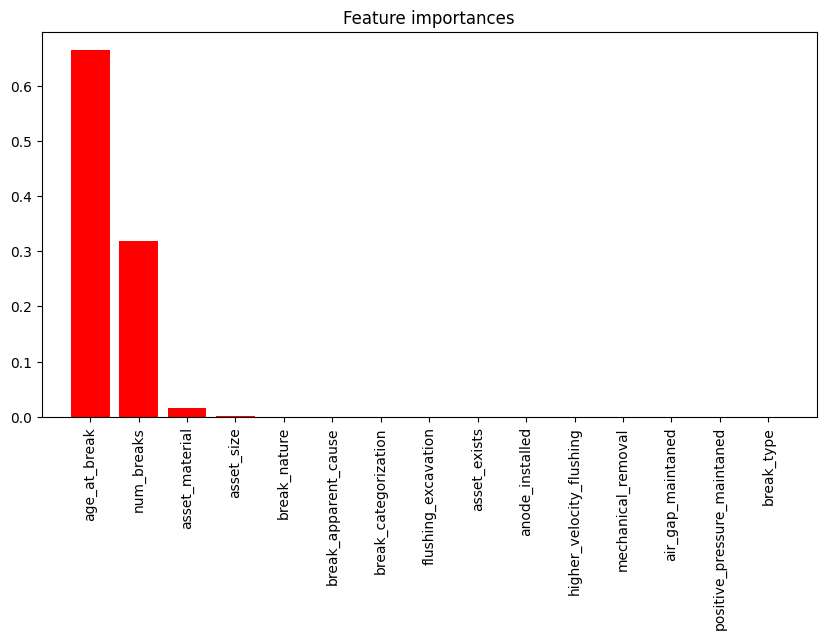

In [25]:
# plotting the feature importances
importances = pipeline.steps[1][1].feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show();

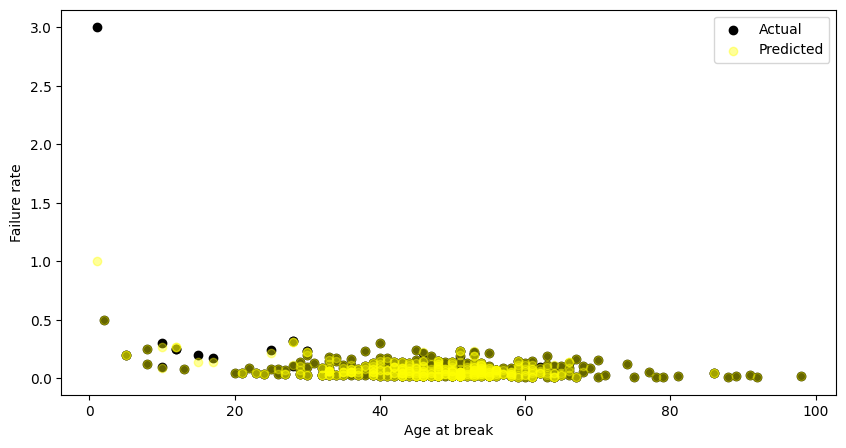

In [29]:
y_pred = pipeline.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(X_test['age_at_break'], y_test, color='black', label='Actual')
plt.scatter(X_test['age_at_break'], y_pred, color='yellow', label='Predicted', alpha=0.4)
plt.xlabel('Age at break')
plt.ylabel('Failure rate')
plt.legend()
plt.show();

In [33]:
final_data = pd.read_csv('../data/processed/final_data.csv')
final_data.sample(5)

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate
13,-80.456403,43.390008,1999-12-28,1,4,4,0,25.0,1987-01-01,8,1,12,1,1,1,1,1,1,1,0.08
65,-80.521297,43.427710,2006-03-20,0,4,4,0,150.0,1964-01-01,1,1,42,1,1,1,1,1,1,1,0.02
1324,-80.543566,43.417831,2007-01-27,0,4,2,0,150.0,1978-01-01,4,1,29,1,1,1,1,1,1,1,0.03
332,-80.462317,43.448686,2003-01-10,0,4,4,0,150.0,1959-01-01,1,1,44,1,1,1,1,1,1,1,0.02
1556,-80.514133,43.428988,2010-03-01,0,0,0,0,150.0,1962-01-01,1,5,48,1,1,1,1,1,1,1,0.10


In [34]:
final_data[final_data['failure_rate'] == np.inf]

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate
505,-80.492340,43.445806,2011-12-15,0,4,4,0,150.0,2011-01-01,6,1,0,1,1,1,1,1,1,1,inf
886,-80.484931,43.456100,2001-07-03,0,4,4,0,50.0,2001-01-01,6,3,0,1,1,1,1,1,1,1,inf
1014,-80.438473,43.406985,2000-12-11,0,4,4,0,50.0,2000-01-01,6,1,0,1,1,1,1,1,1,1,inf
1077,-80.484936,43.456094,2001-07-06,0,4,4,0,50.0,2001-01-01,6,3,0,1,1,1,1,1,1,1,inf
1118,-80.490677,43.444917,2011-12-15,0,4,4,0,150.0,2011-01-01,6,1,0,1,1,1,1,1,1,1,inf
1378,-80.508320,43.440505,2017-07-24,0,4,4,0,150.0,2017-01-01,7,1,0,1,1,1,1,1,0,1,inf


In [35]:
inf_values = final_data[final_data['failure_rate'] == np.inf]
final_data = final_data.drop(inf_values.index, axis=0)

In [37]:
final_data.drop(['incident_date', 'asset_year_installed'], axis=1, inplace=True)

In [38]:
final_X = final_data.drop('failure_rate', axis=1)
final_y = final_data['failure_rate']

X_train, X_test, y_train, y_test = train_test_split(final_X, final_y, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8740165343891695

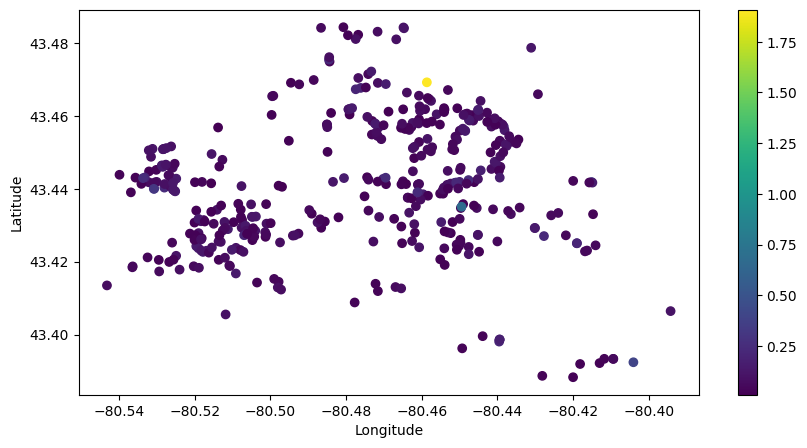

In [39]:
y_pred = rf.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(X_test['longitude'], X_test['latitude'], c=y_pred, cmap='viridis')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show();

In [40]:
import config
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [49]:
px.set_mapbox_access_token(config.token)
token = config.token
fig = px.scatter_mapbox(data_frame=X_test, lat='latitude', lon='longitude',
                        color='age_at_break', size=y_pred.round(2), hover_name=y_pred.round(2),
                        color_continuous_scale=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style='carto-positron', mapbox_accesstoken=token)
fig.show(renderer='notebook_connected')